<img src="https://cdn.pixabay.com/photo/2013/07/13/01/22/vegetables-155616_1280.png" style="width:100%">

## **🔻 About ResNET Model**
🔹 ResNet stands for "`Residual Network`" which is a deep learning architecture primarily used for image recognition tasks.

🔹 😎 It was introduced by Microsoft Research in 2015 and won the ImageNet competition, showcasing its effectiveness.

🔹 ResNet architectures are typically deeper than traditional CNNs, with hundreds or even thousands of layers.

🔹 😲 The most popular versions of ResNet are ResNet-50, ResNet-101, and ResNet-152, which have 50, 101, and 152 layers, respectively.

🔹 ResNet models use a building block called a "`residual block`" that consists of a series of convolutional layers, batch normalization, and activation functions.

🔹 😄 ResNet-50 and similar variants have significantly improved the accuracy of image classification tasks compared to previous models.

🔹 🏢 ResNet's architecture has inspired the development of other deep learning models, such as DenseNet and Wide ResNet.

🔹 ResNet has also been successfully applied to other domains beyond image recognition, including object detection and semantic segmentation.

🔹 🌟 ResNet's impact on deep learning research and its practical applications has made it one of the most influential deep learning models to date.

## **🔻Fruits-360 Dataset**

**About Dataset**

- **Name:** Fruits-360 dataset
- **Version:** 2020.05.18.0
- **Content:** Images of fruits, vegetables, and nuts

**Dataset Properties**

- **Total Images:** 90,483
- **Training Set:** 67,692 images (one object per image)
- **Test Set:** 22,688 images (one object per image)
- **Classes:** 131 (fruits and vegetables)
- **Image Size:** 100x100 pixels

**Filename Format:** 
- `image_index_100.jpg`
- `r_image_index_100.jpg` (rotated fruit)
- `r2_image_index_100.jpg` or `r3_image_index_100.jpg` (rotated around the 3rd axis)

**Warning**

A new major version of the dataset is under release. Please ensure file names contain "_100" suffix for the 100x100 version.

**How Fruits Were Filmed**

- Fruits were planted on a low-speed motor and filmed using a Logitech C920 camera with a white sheet background.
- Watch filming process [here](https://youtu.be/_HFKJ144JuU)

**Background Extraction**

- Due to lighting variations, a flood-fill algorithm was used to extract fruits from the background.

**How to Cite**

Mihai Oltean, Fruits-360 dataset, 2017-

**Alternate Download**

- [GitHub Repository](https://github.com/fruits-360)

**History**

- Fruits were filmed on various dates from 2017 to 2019.



<a id="1"></a>
# <b> <span style='color:dimgray'>Step 1</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Libraries</span></b>

In [3]:
# import libraries
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <b> <span style='color:dimgray'>Step 2</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Load Data</span></b>

In [4]:
# load dataset
train_dir = '/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Test'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)


Found 70491 files belonging to 141 classes.
Using 56393 files for training.
Found 70491 files belonging to 141 classes.
Using 14098 files for validation.


<a id="3"></a>
# <b> <span style='color:dimgray'>Step 3</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Name of Classes</span></b>

In [5]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)


Class Names: ['Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple hit 1', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1', 'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Granadilla 1', 'Grape Blue 1', 'Grape Pink 1', 'Grape White 1', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink 1', 'Grapefruit White

<a id="4"></a>
# <b> <span style='color:dimgray'>Step 4</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Showing Images</span></b>

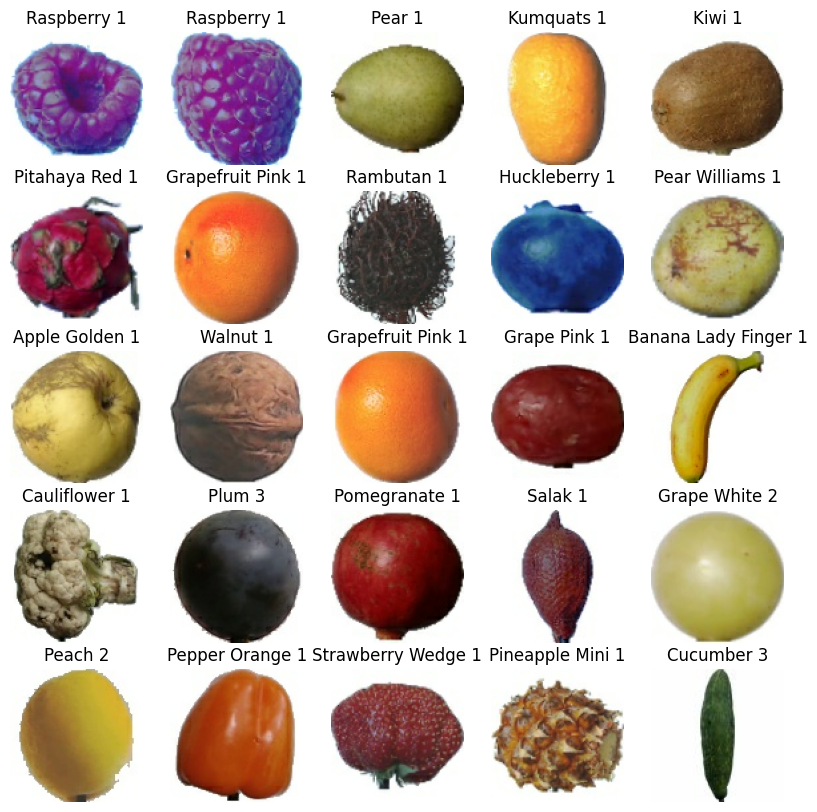

In [6]:
# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()


<a id="5"></a>
# <b> <span style='color:dimgray'>Step 5</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Configure Dataset For Performance</span></b>

**The variable AUTOTUNE in TensorFlow's tf.data.experimental module is used to dynamically tune the buffer size during data processing for optimal performance. In the given code, the training and validation datasets are cached and pre-fetched using AUTOTUNE as the buffer size, enabling faster data loading and processing during model training.**

In [7]:
# for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<a id="6"></a>
# <b> <span style='color:dimgray'>Step 6</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Data Augmentation</span></b>

**When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). You can learn more about data augmentation in this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation).**

In [8]:
# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

<a id="7"></a>
# <b> <span style='color:dimgray'>Step 7</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>ResNEt Model For Transfer Learning</span></b>

**🔥 ResNet, short for Residual Network, is a popular model for transfer learning in deep learning. Its architecture, with skip connections and residual blocks, allows for efficient training of deep neural networks, making it highly effective in tasks such as image classification and object detection. 🚀**

In [9]:
# Using resNET model of transfer learning for training 
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

In [11]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)

<a id="8"></a>
# <b> <span style='color:dimgray'>Step 8</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Build Model</span></b>

In [12]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [14]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

<a id="9"></a>
# <b> <span style='color:dimgray'>Step 9</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Train Model</span></b>

In [15]:

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(patience=3)

# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stopping]  # Add the EarlyStopping callback to the training process
)

Epoch 1/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 150s 53ms/step - accuracy: 0.4786 - loss: 2.5426 - val_accuracy: 0.9685 - val_loss: 0.2653
Epoch 2/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9507 - loss: 0.2607 - val_accuracy: 0.9912 - val_loss: 0.1031
Epoch 3/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9806 - loss: 0.1178 - val_accuracy: 0.9961 - val_loss: 0.0560
Epoch 4/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.9897 - loss: 0.0673 - val_accuracy: 0.9970 - val_loss: 0.0353
Epoch 5/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9942 - loss: 0.0434 - val_accuracy: 0.9987 - val_loss: 0.0236
Epoch 6/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.9957 - loss: 0.0301 - val_accuracy: 0.9995 - val_loss: 0.0173
Epoch 7/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.9968 - loss: 0.0225 - val_accuracy: 0.9994 - val_loss: 0.0131
Epoch 8/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9977 

<a id="10"></a>
# <b> <span style='color:dimgray'>Step 10</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Accuracy Plot</span></b>

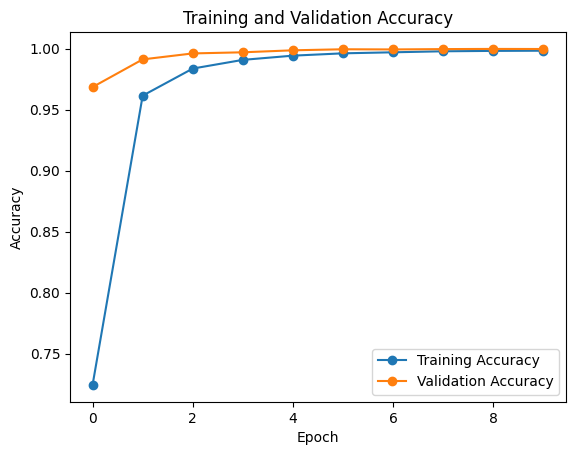

In [16]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

<a id="11"></a>
# <b> <span style='color:dimgray'>Step 11</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Loss Plot</span></b>

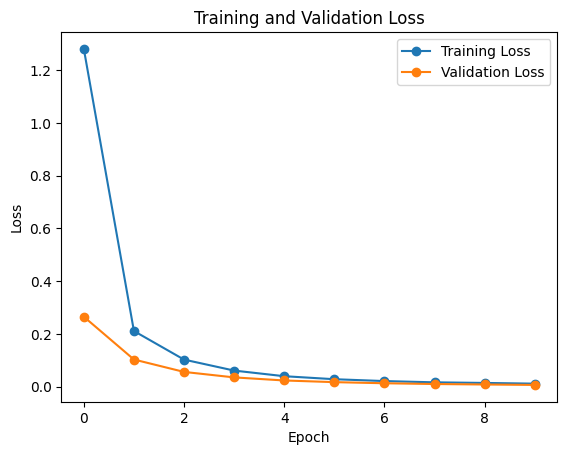

In [17]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

<a id="12"></a>
# <b> <span style='color:dimgray'>Step 12</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Predict Images</span></b>

In [18]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


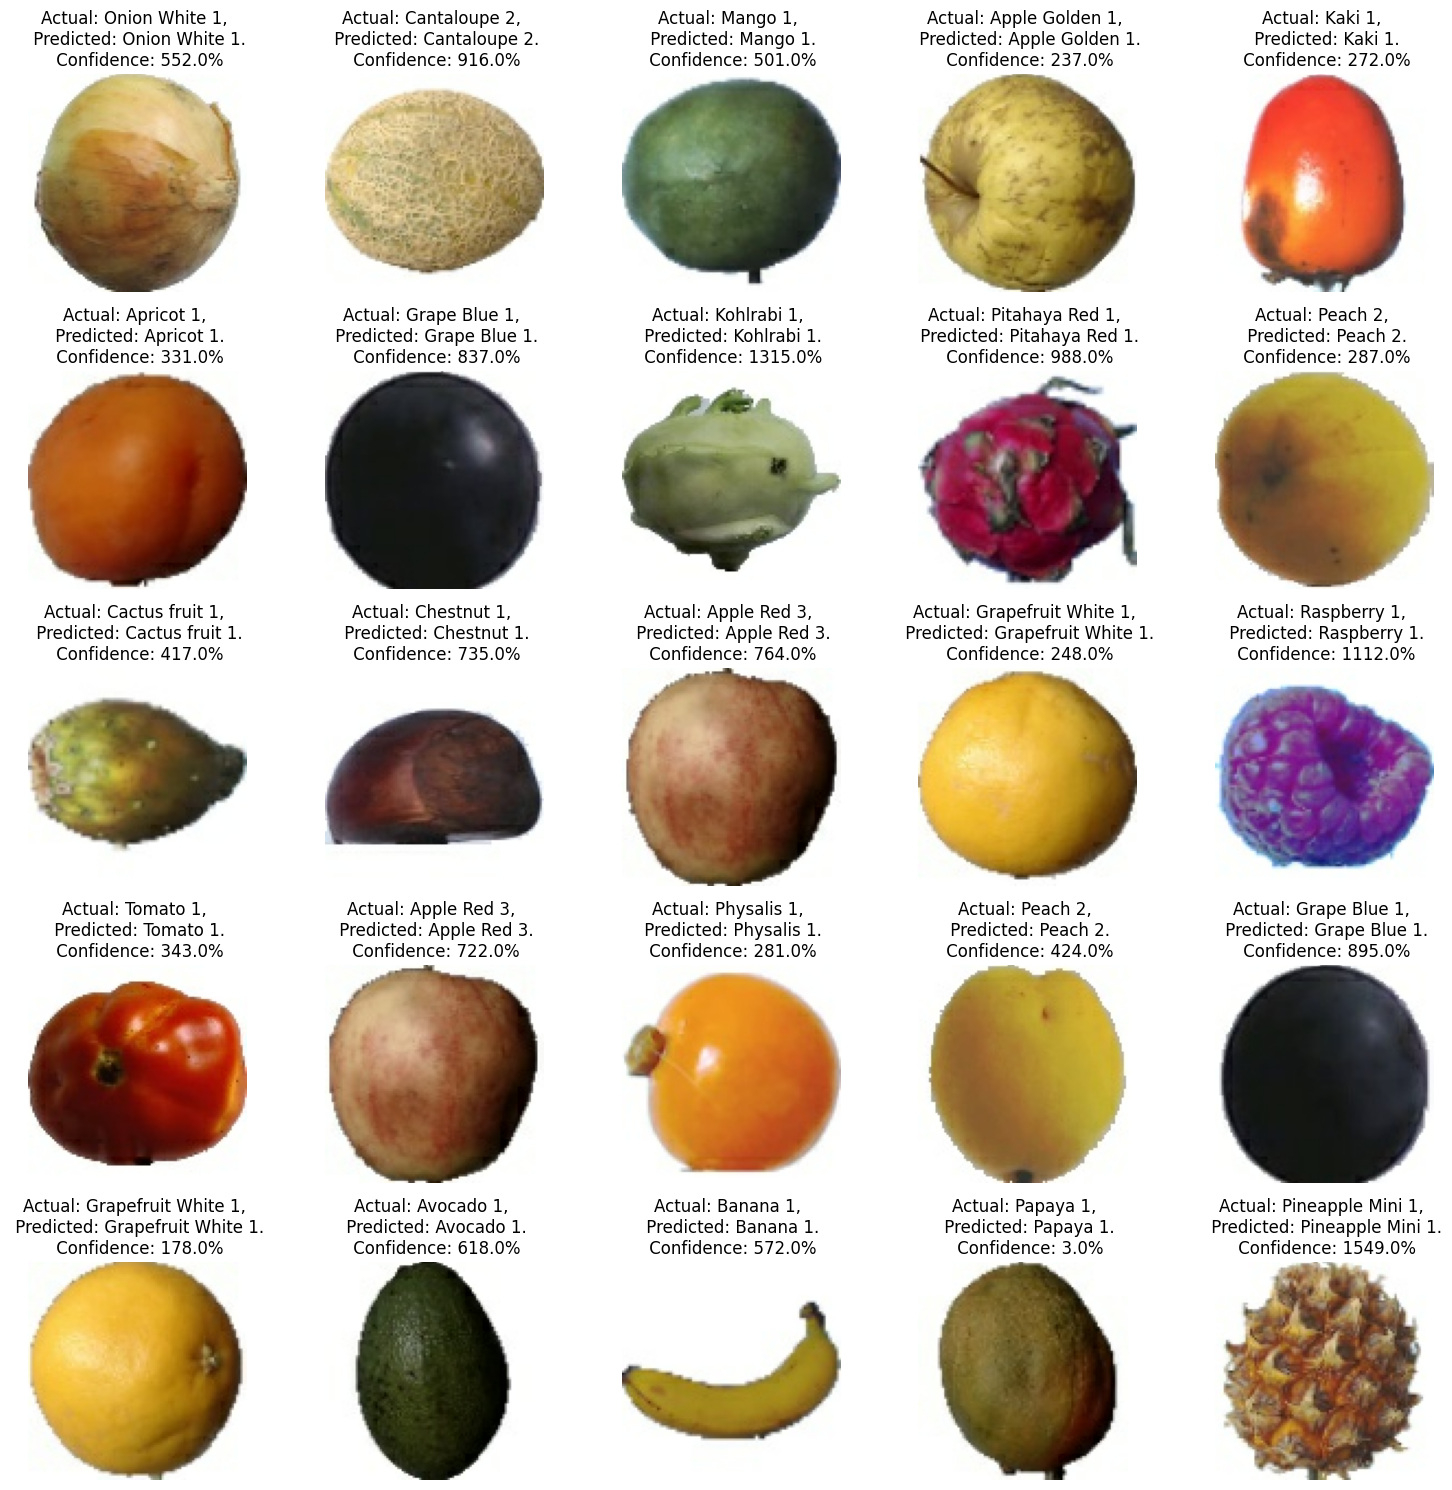

In [19]:
import matplotlib.pyplot as plt

# Assuming val_ds is your validation dataset
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)  # Adjust the subplot layout as per your preference
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis('off')

plt.tight_layout()
plt.show()
